In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import vpfits

# Observed Spectrum

Here we test VAMP on a spectrum measured from quasar Q1422+231, at redshift 3.62.

In [2]:
# cont = pd.read_table('q1422.cont', delim_whitespace=True, header=None)
# cont.columns = ['wavelength', 'velocity', 'flux', 'noise']
# cont.head()

In [3]:
cont = np.loadtxt('data/q1422.cont')

In [4]:
vpfit = vpfits.VPfit()

# Region Detection

We perform region detection on the entire spectrum, dividing it into re

In [5]:
min_region_width = 2

regions = vpfits.compute_detection_regions(cont[:,0], cont[:,2], cont[:,3], 
                                          min_region_width=min_region_width)

#regions = vpfit.compute_detection_regions(cont['wavelength'], cont['flux'], cont['noise'], 
#                                          buffer=buffer, min_region_width=min_region_width)

Computing detection regions...
Found 421 detection regions.


In [6]:
# region_arrays = []
# region_pixels = []
# for region in regions:
#     start = np.where(cont['wavelength'] == region[0])[0][0]
#     end = np.where(cont['wavelength'] == region[1])[0][0]
#     region_pixels.append([start, end])
#     region_arrays.append([cont['wavelength'][start:end], cont['flux'][start:end]])

In [7]:
region_arrays = []
region_pixels = []
for region in regions:
    start = np.where(cont[:,0] == region[0])[0][0]
    end = np.where(cont[:,0] == region[1])[0][0]
    region_pixels.append([start, end])
    region_arrays.append([cont[:,0][start:end], cont[:,2][start:end]])

In [8]:
def plot_bracket(x, axis, dir):
    height = .2
    arm_length = 0.2
    axis.plot((x, x), (1-height/2, 1+height/2), color='magenta')

    if dir=='left':
        xarm = x+arm_length
    if dir=='right':
        xarm = x-arm_length

    axis.plot((x, xarm), (1-height/2, 1-height/2), color='magenta')
    axis.plot((x, xarm), (1+height/2, 1+height/2), color='magenta')


In [9]:
# N = 6

# fig, ax = plt.subplots(N, figsize=(10,10))

# for n in range(N):
    
#     length = len(cont) / N
    
#     lower_lim = n*length
#     upper_lim = n*length+length
    
#     ax[n].plot(cont['wavelength'], cont['flux'], c='black')
    
#     ax[n].set_xlim(cont['wavelength'][lower_lim], cont['wavelength'][upper_lim])

#     for arr in region_arrays:
#         ax[n].plot(arr[0], arr[1], color='blue')

#     for (start, end) in region_pixels:
#         plot_bracket(cont['wavelength'][start], ax[n], 'left')
#         plot_bracket(cont['wavelength'][end], ax[n], 'right')


# plt.show()

Figure(1080x1080)


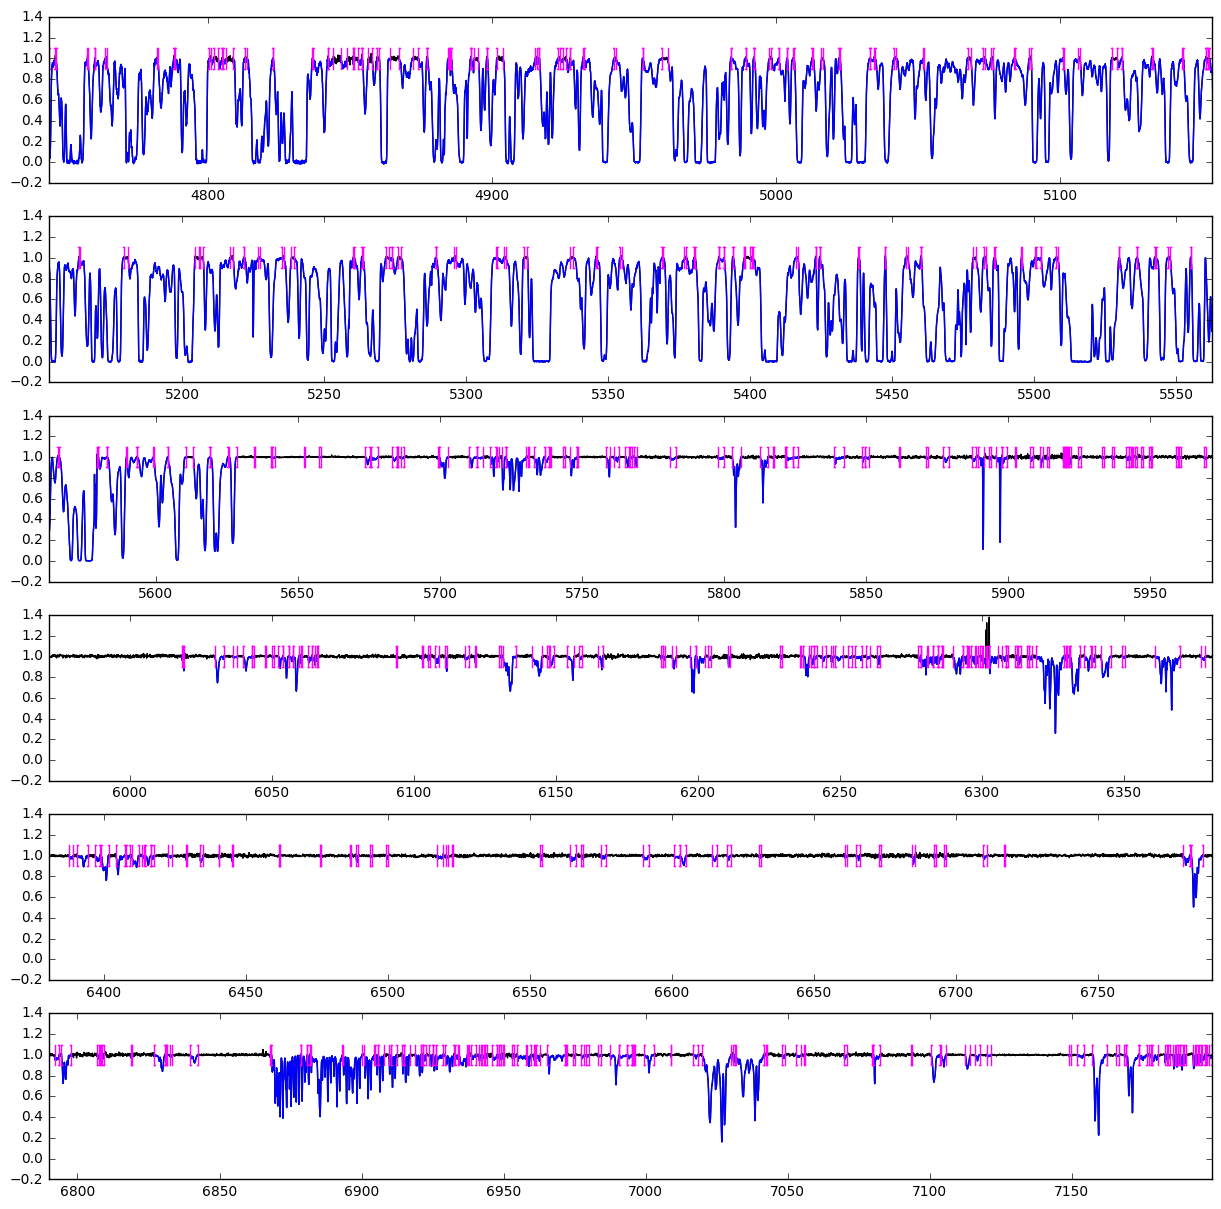

In [10]:
N = 6
fig, ax = plt.subplots(N, figsize=(15,15))

for n in range(N):
    length = len(cont) / N
    
    lower_lim = n*length
    upper_lim = n*length+length
    
    ax[n].plot(cont[:,0], cont[:,2], c='black')
    
    ax[n].set_xlim(cont[:,0][lower_lim], cont[:,0][upper_lim])

    for arr in region_arrays:
        ax[n].plot(arr[0], arr[1], color='blue')

    for (start, end) in region_pixels:
        plot_bracket(cont[:,0][start], ax[n], 'left')
        plot_bracket(cont[:,0][end], ax[n], 'right')

plt.show()

## Fit

n:  2
Fit 1 BIC:  -147.498821295 , Fit 2 BIC:  -161.190130478
BIC Ratio:  0.915061119796
n:  3
Fit 1 BIC:  -161.190130478 , Fit 2 BIC:  -206.719183275
BIC Ratio:  0.779754098891
n:  4
Fit 1 BIC:  -206.719183275 , Fit 2 BIC:  -198.009305214
BIC Ratio:  1.04398721591
n (final):  3
 [-----------------100%-----------------] 10000 of 10000 complete in 11.1 sec
Took: 0:00:11.078200  to finish.


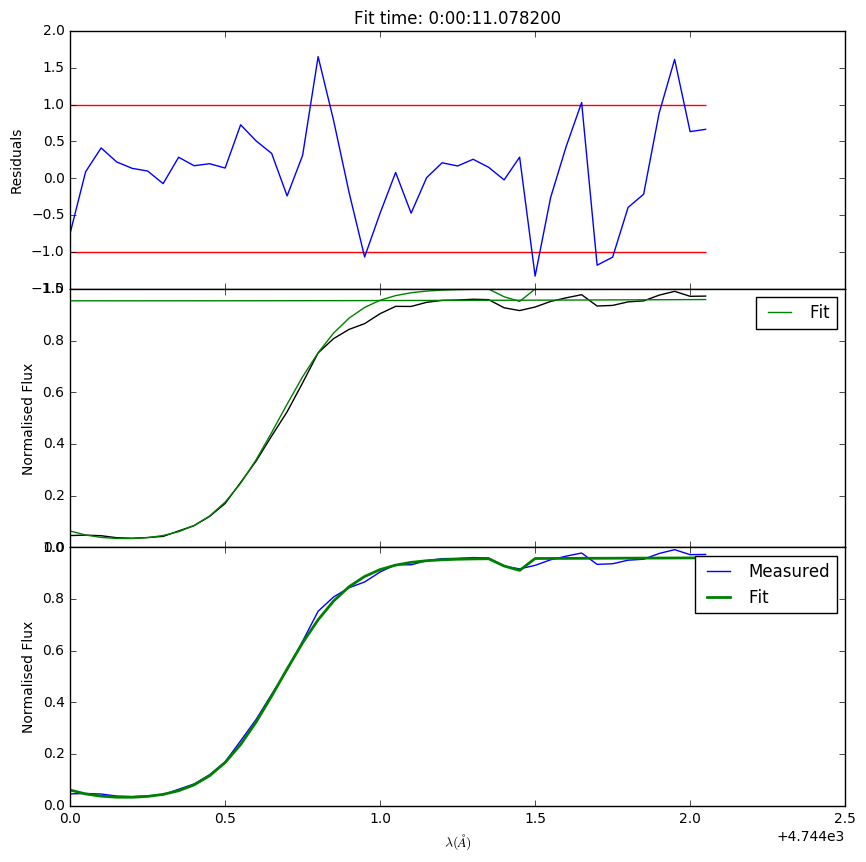

n:  2
Fit 1 BIC:  -164.674549021 , Fit 2 BIC:  -254.49897506
BIC Ratio:  0.647053879028
n:  3
Fit 1 BIC:  -254.49897506 , Fit 2 BIC:  -315.003241575
BIC Ratio:  0.807924940034
n:  4
Fit 1 BIC:  -315.003241575 , Fit 2 BIC:  -668.49954293
BIC Ratio:  0.471209359687
n:  5
Fit 1 BIC:  -668.49954293 , Fit 2 BIC:  -626.372686994
BIC Ratio:  1.06725525683
n (final):  4
 [-----------------100%-----------------] 10000 of 10000 complete in 16.4 sec
Took: 0:00:16.383509  to finish.


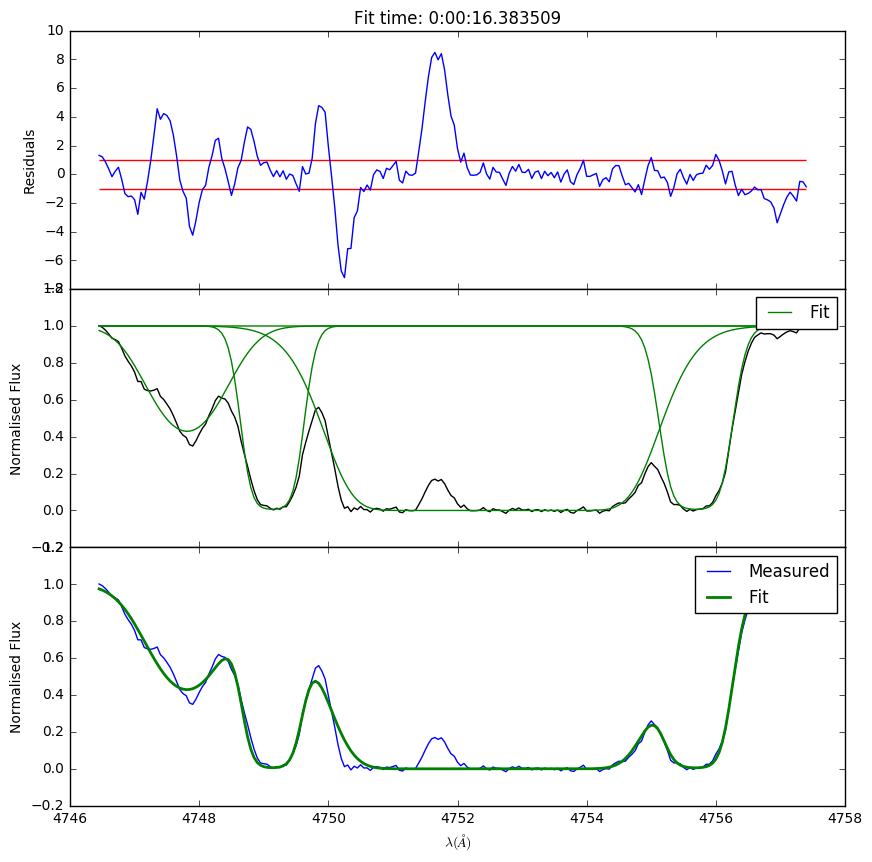

n:  2
Fit 1 BIC:  -168.939693852 , Fit 2 BIC:  -239.479682571
BIC Ratio:  0.705444787794
n:  3
Fit 1 BIC:  -239.479682571 , Fit 2 BIC:  -258.16347475
BIC Ratio:  0.927628057387
n:  4
Fit 1 BIC:  -258.16347475 , Fit 2 BIC:  -260.587077844
BIC Ratio:  0.990699450205
n (final):  3
 [-----------------100%-----------------] 10000 of 10000 complete in 11.4 sec
Took: 0:00:11.415820  to finish.


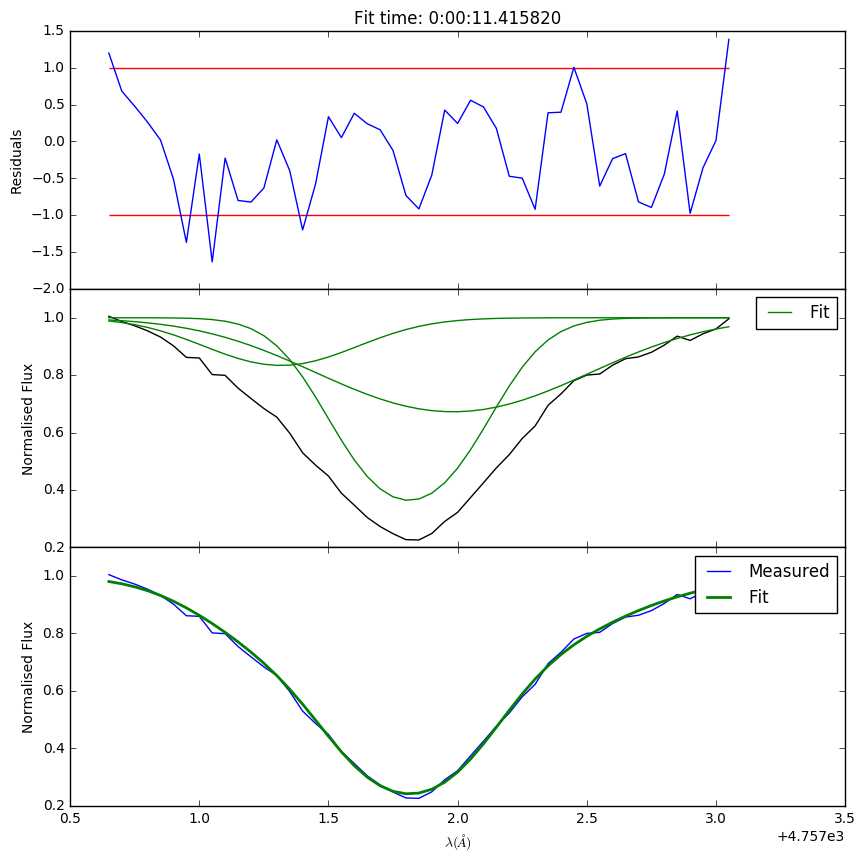

n:  2
Fit 1 BIC:  -271.293517552 , Fit 2 BIC:  -330.000765829
BIC Ratio:  0.822099660497
n:  3
Fit 1 BIC:  -330.000765829 , Fit 2 BIC:  -318.010870072
BIC Ratio:  1.03770278593
n (final):  2
 [-----------------100%-----------------] 10000 of 10000 complete in 7.6 sec
Took: 0:00:07.597001  to finish.


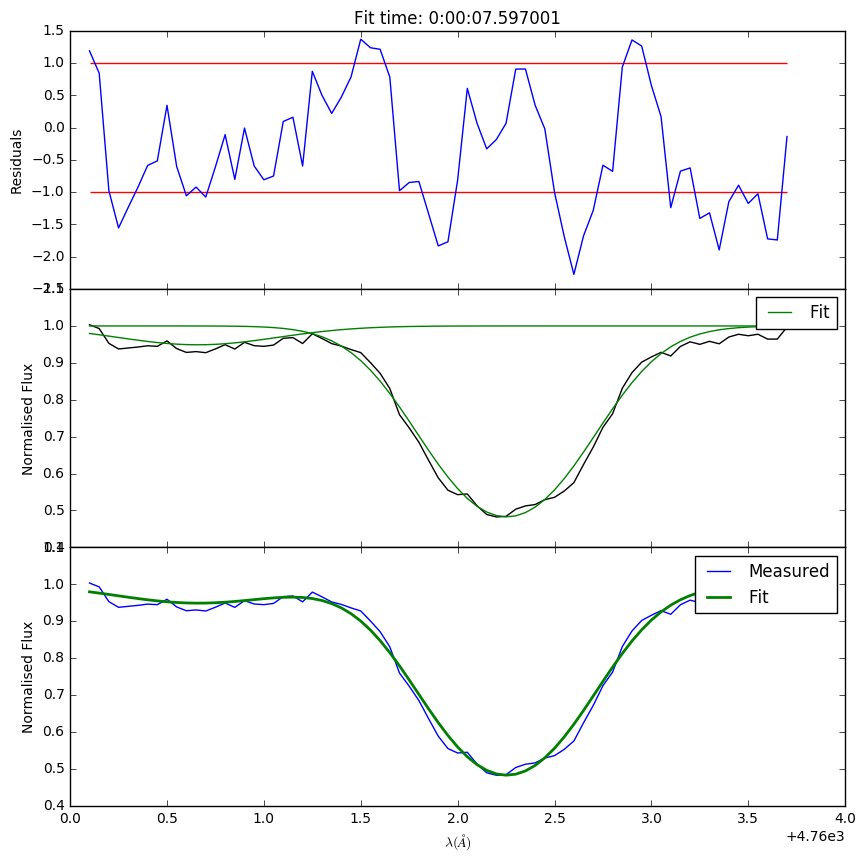

n:  2
Fit 1 BIC:  59.0178847073 , Fit 2 BIC:  -35.4145466359
BIC Ratio:  -1.66648708832
n:  3
Fit 1 BIC:  -35.4145466359 , Fit 2 BIC:  -246.475282023
BIC Ratio:  0.14368396841
n:  4
Fit 1 BIC:  -246.475282023 , Fit 2 BIC:  -409.152415312
BIC Ratio:  0.602404563186
n:  5
Fit 1 BIC:  -409.152415312 , Fit 2 BIC:  -363.219601682
BIC Ratio:  1.1264601729
n (final):  4
 [-----------------100%-----------------] 10000 of 10000 complete in 18.8 sec
Took: 0:00:18.850572  to finish.


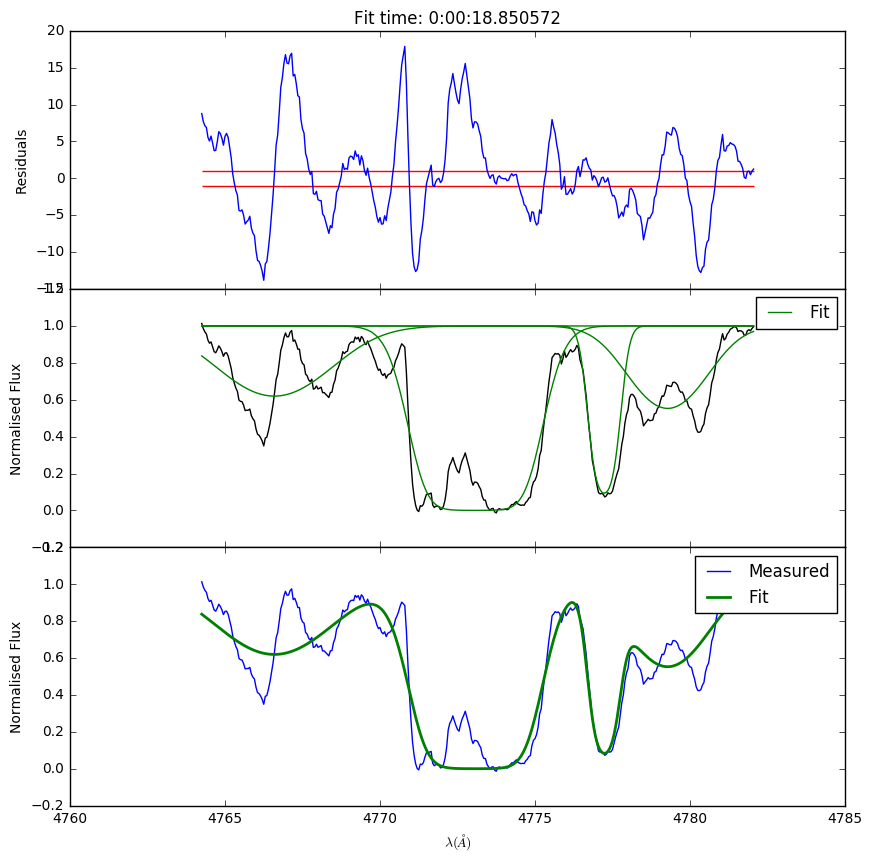

n:  2
Fit 1 BIC:  -172.139526532 , Fit 2 BIC:  -358.604510926
BIC Ratio:  0.480026104768
n:  3
Fit 1 BIC:  -358.604510926 , Fit 2 BIC:  -386.486320801
BIC Ratio:  0.927858223241
n:  4
Fit 1 BIC:  -386.486320801 , Fit 2 BIC:  -374.519031193
BIC Ratio:  1.03195375565
n (final):  3
 [-----------------100%-----------------] 10000 of 10000 complete in 13.3 sec
Took: 0:00:13.353393  to finish.


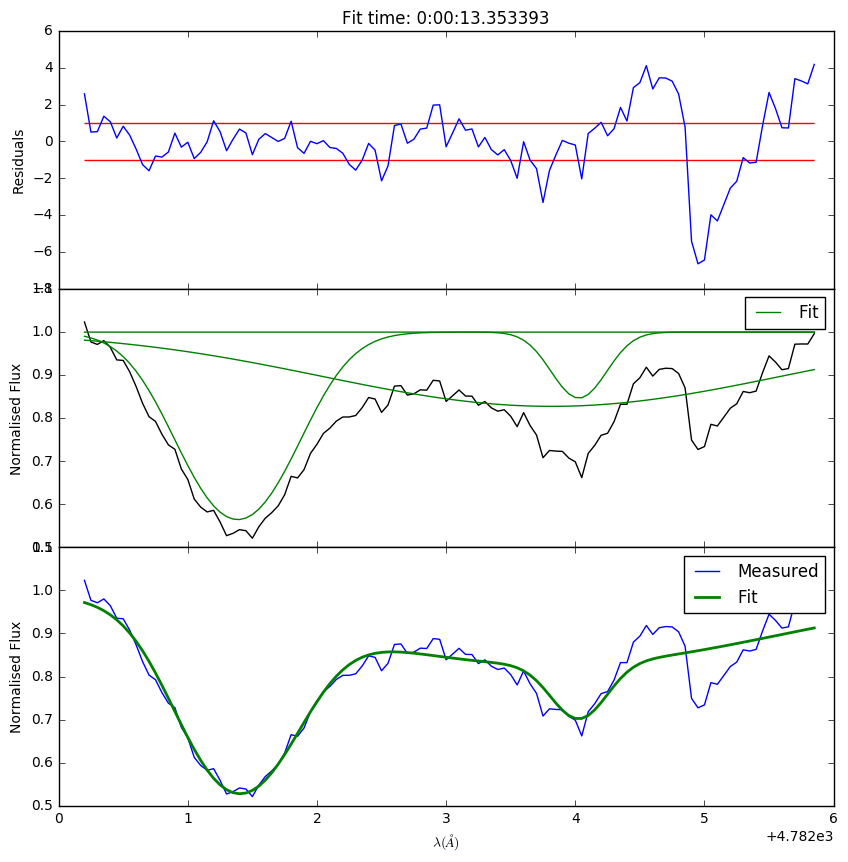

n:  2
Fit 1 BIC:  129.505729664 , Fit 2 BIC:  -241.266268903
BIC Ratio:  -0.536775116775
n:  3
Fit 1 BIC:  -241.266268903 , Fit 2 BIC:  -276.174015804
BIC Ratio:  0.873602348871
n:  4
Fit 1 BIC:  -276.174015804 , Fit 2 BIC:  -603.867110963
BIC Ratio:  0.457342370184
n:  5
Fit 1 BIC:  -603.867110963 , Fit 2 BIC:  -248.720443319
BIC Ratio:  2.42789496073
n (final):  4
 [-----------------95%----------------  ] 9571 of 10000 complete in 18.1 secHalting at iteration  9698  of  10000

Took: 0:00:18.386568  to finish.


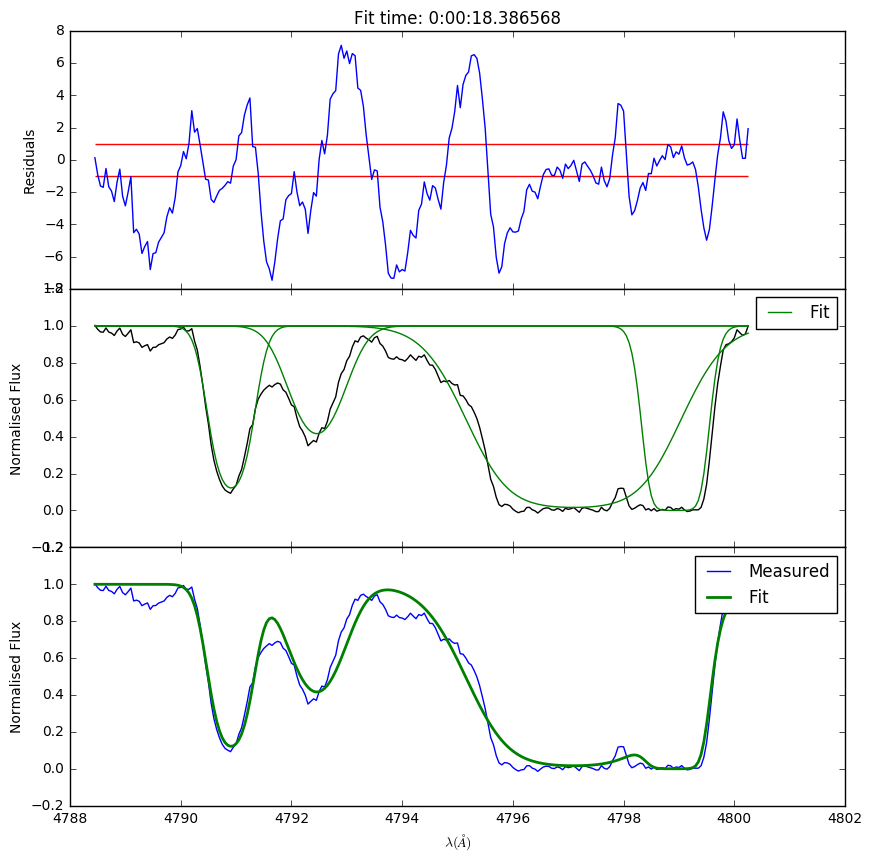

n:  2
Fit 1 BIC:  -100.542998902 , Fit 2 BIC:  -91.6953516963
BIC Ratio:  1.09648959344
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 3.7 sec
Took: 0:00:03.714049  to finish.


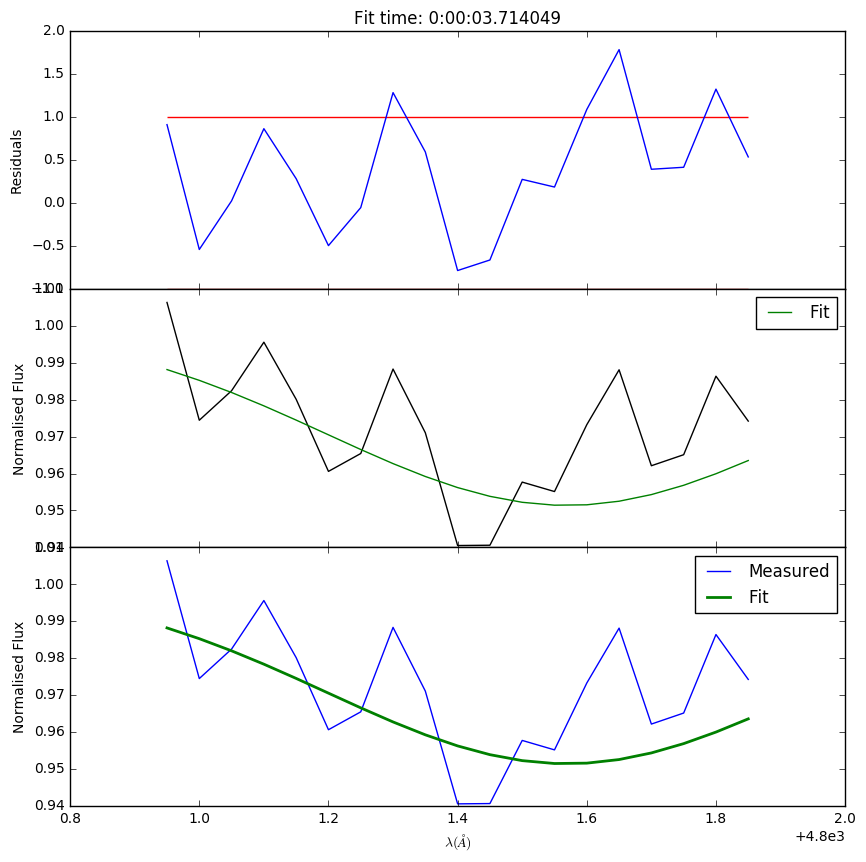

n:  2
Fit 1 BIC:  -62.3739417967 , Fit 2 BIC:  -121.628411469
BIC Ratio:  0.51282378059
n:  3
Fit 1 BIC:  -121.628411469 , Fit 2 BIC:  -117.442173546
BIC Ratio:  1.03564509917
n (final):  2
 [-----------------100%-----------------] 10000 of 10000 complete in 6.4 sec
Took: 0:00:06.420498  to finish.


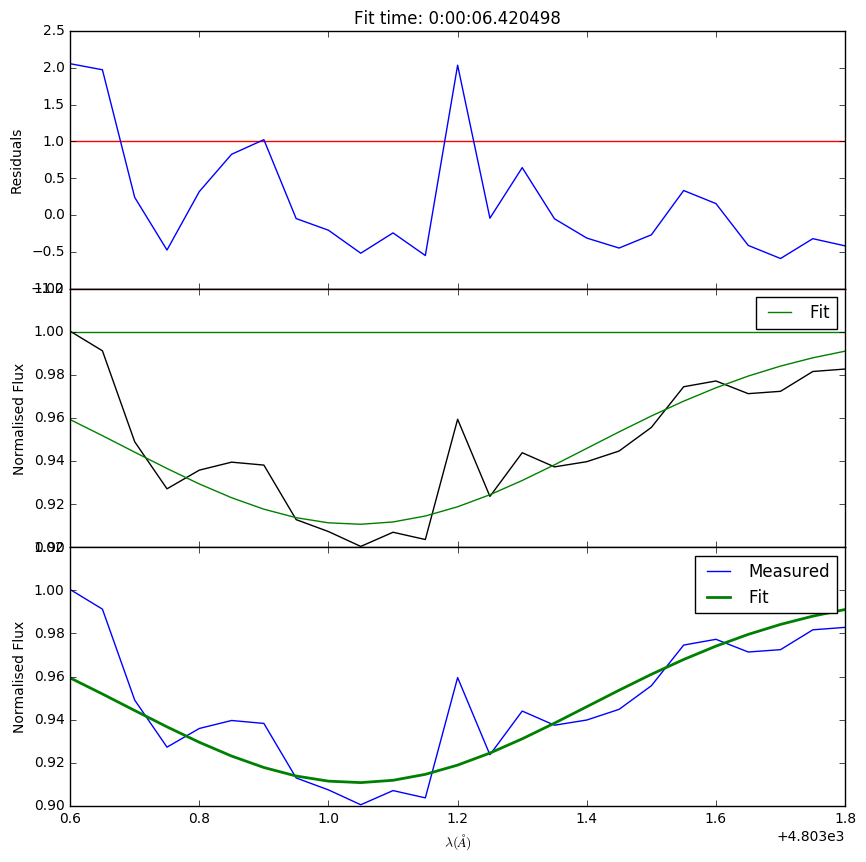

n:  2
Fit 1 BIC:  -70.2136110328 , Fit 2 BIC:  -115.058281506
BIC Ratio:  0.610243870441
n:  3
Fit 1 BIC:  -115.058281506 , Fit 2 BIC:  -56.4527665829
BIC Ratio:  2.03813361985
n (final):  2
 [-----------------100%-----------------] 10000 of 10000 complete in 6.4 sec
Took: 0:00:06.381624  to finish.


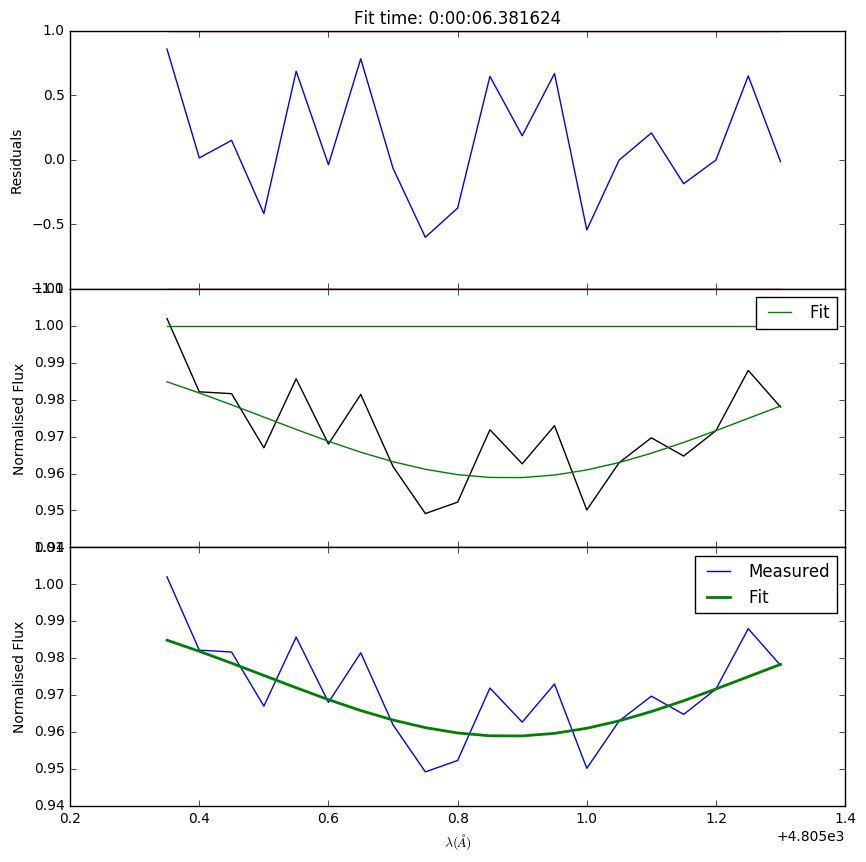

n:  2
Fit 1 BIC:  -51.8092530947 , Fit 2 BIC:  -192.658588782
BIC Ratio:  0.268917432761
n:  3
Fit 1 BIC:  -192.658588782 , Fit 2 BIC:  -342.467622979
BIC Ratio:  0.562560008174
n:  4
Fit 1 BIC:  -342.467622979 , Fit 2 BIC:  -405.55279351
BIC Ratio:  0.844446465317
n:  5
Fit 1 BIC:  -405.55279351 , Fit 2 BIC:  -399.312820337
BIC Ratio:  1.01562677895
n (final):  4
 [-----------------100%-----------------] 10000 of 10000 complete in 14.2 sec
Took: 0:00:14.159906  to finish.


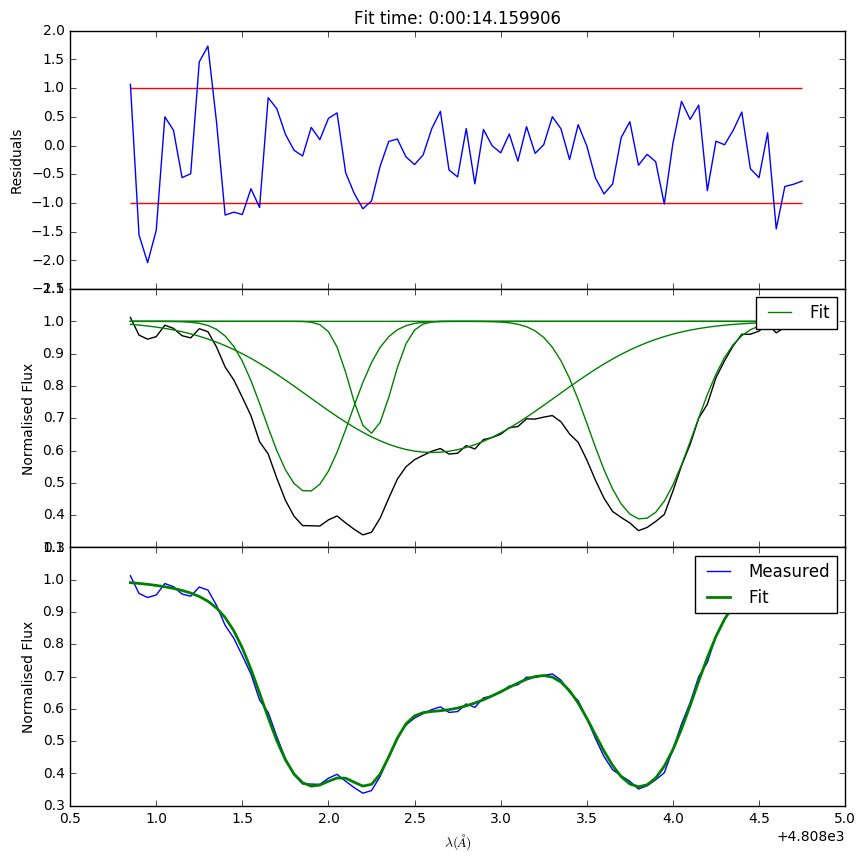

n:  2
Fit 1 BIC:  -132.362528639 , Fit 2 BIC:  -392.06017374
BIC Ratio:  0.337607687556
n:  3
Fit 1 BIC:  -392.06017374 , Fit 2 BIC:  -524.109397758
BIC Ratio:  0.748050264729
n:  4
Fit 1 BIC:  -524.109397758 , Fit 2 BIC:  -538.703933366
BIC Ratio:  0.972908058203
n (final):  3
 [-----------------100%-----------------] 10000 of 10000 complete in 13.3 sec
Took: 0:00:13.280322  to finish.


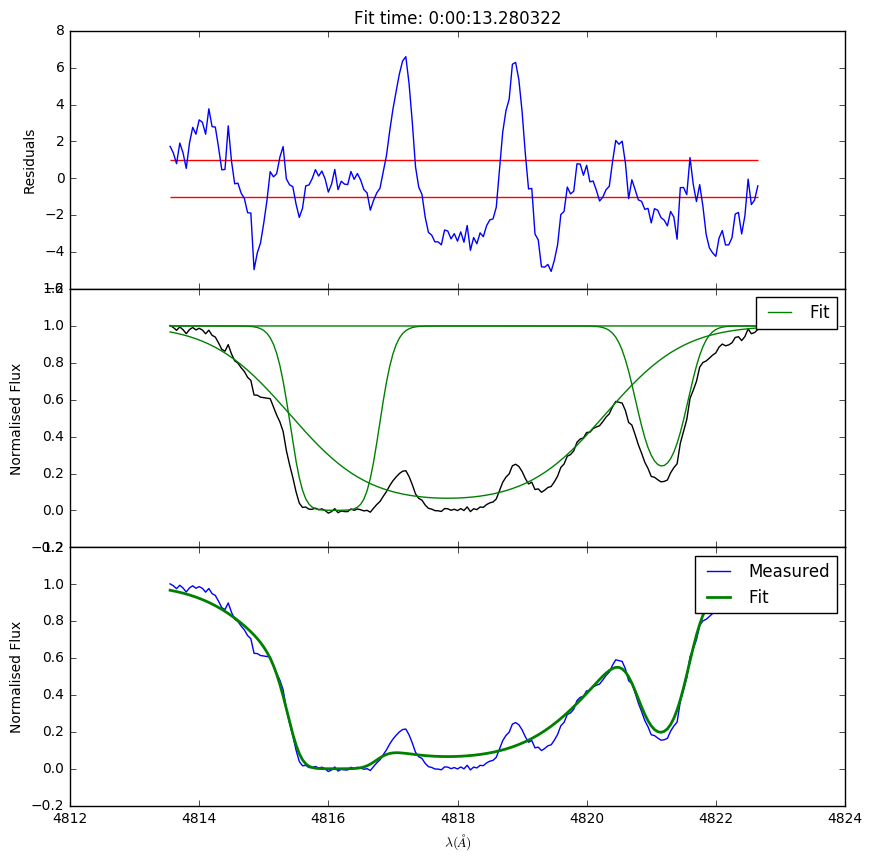

n:  2
Fit 1 BIC:  -104.662352311 , Fit 2 BIC:  -223.570130668
BIC Ratio:  0.468141034753
n:  3
Fit 1 BIC:  -223.570130668 , Fit 2 BIC:  -284.53356726
BIC Ratio:  0.78574254989
n:  4
Fit 1 BIC:  -284.53356726 , Fit 2 BIC:  -487.348704375
BIC Ratio:  0.583839794188
n:  5
Fit 1 BIC:  -487.348704375 , Fit 2 BIC:  -251.333092846
BIC Ratio:  1.93905505581
n (final):  4
 [-----------------100%-----------------] 10000 of 10000 complete in 26.0 sec
Took: 0:00:26.033375  to finish.


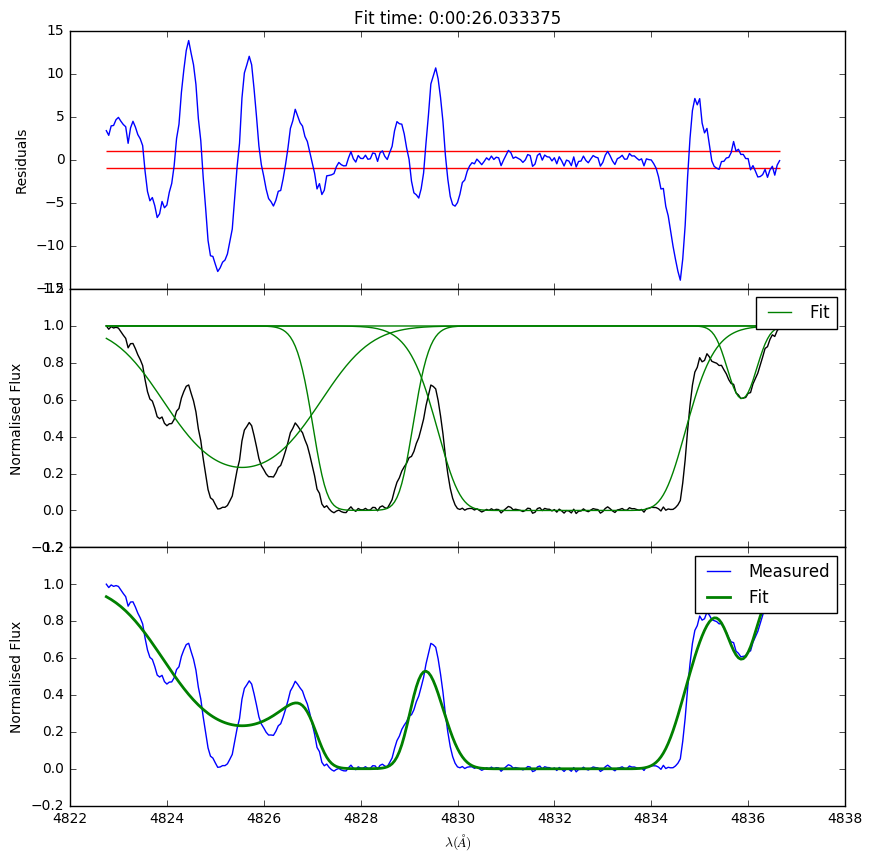

n:  2
Fit 1 BIC:  -270.960255884 , Fit 2 BIC:  -264.996058115
BIC Ratio:  1.02250674147
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 5.8 sec
Took: 0:00:05.832317  to finish.


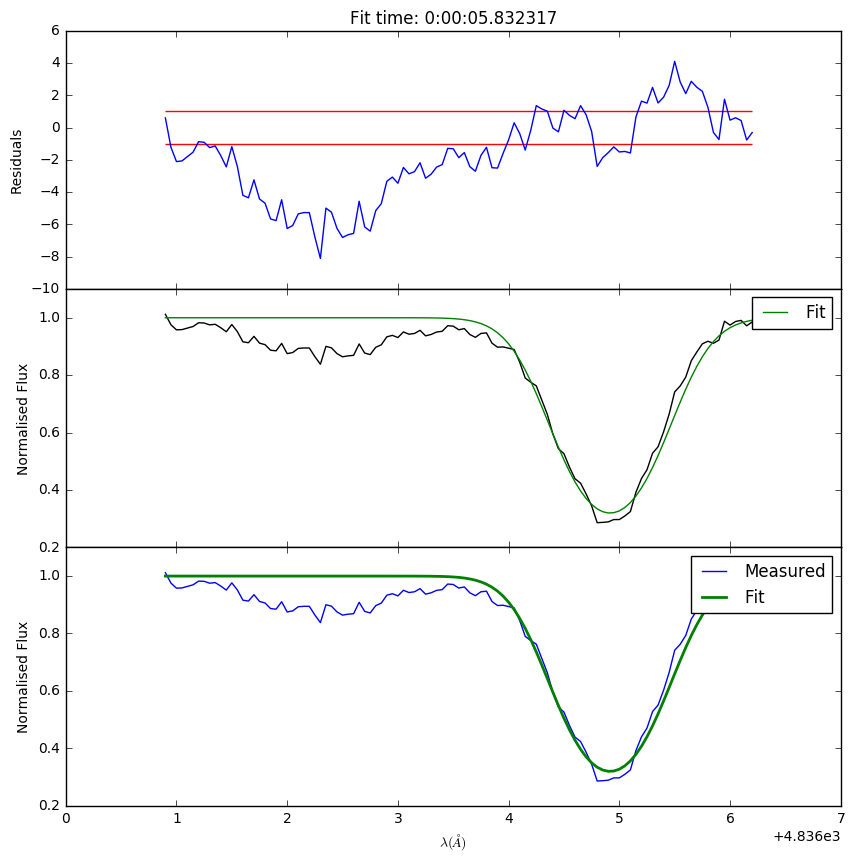

n:  2
Fit 1 BIC:  -166.635084389 , Fit 2 BIC:  -96.4967015395
BIC Ratio:  1.72684746453
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 5.4 sec
Took: 0:00:05.422821  to finish.


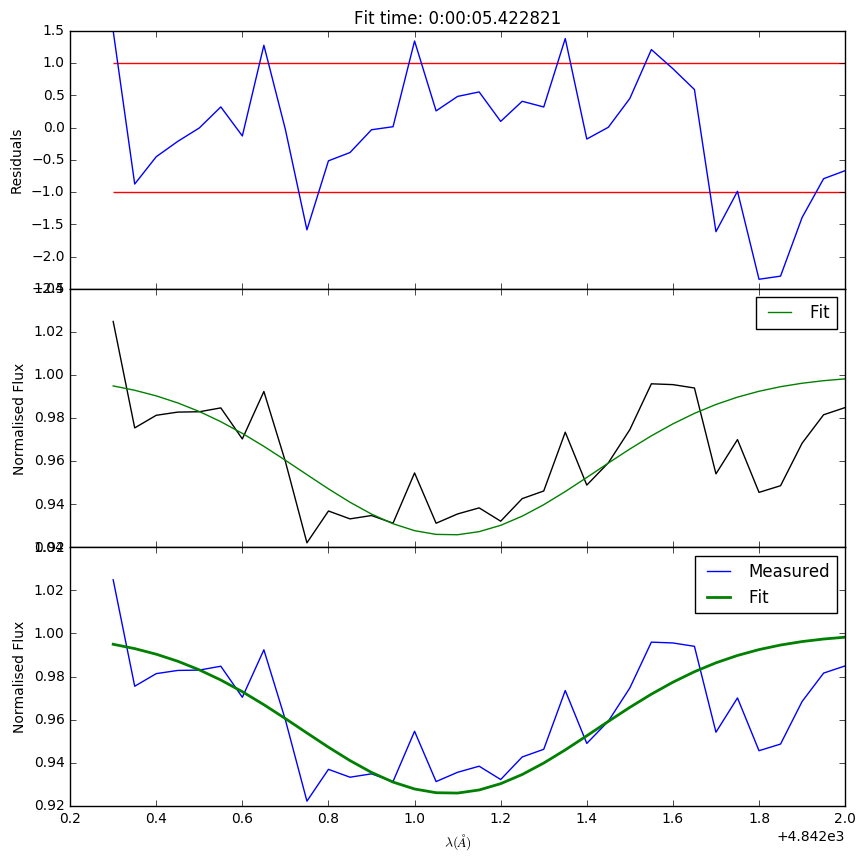

n:  2
Fit 1 BIC:  -218.429605323 , Fit 2 BIC:  -210.269165497
BIC Ratio:  1.03880949357
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 5.9 sec
Took: 0:00:05.933161  to finish.


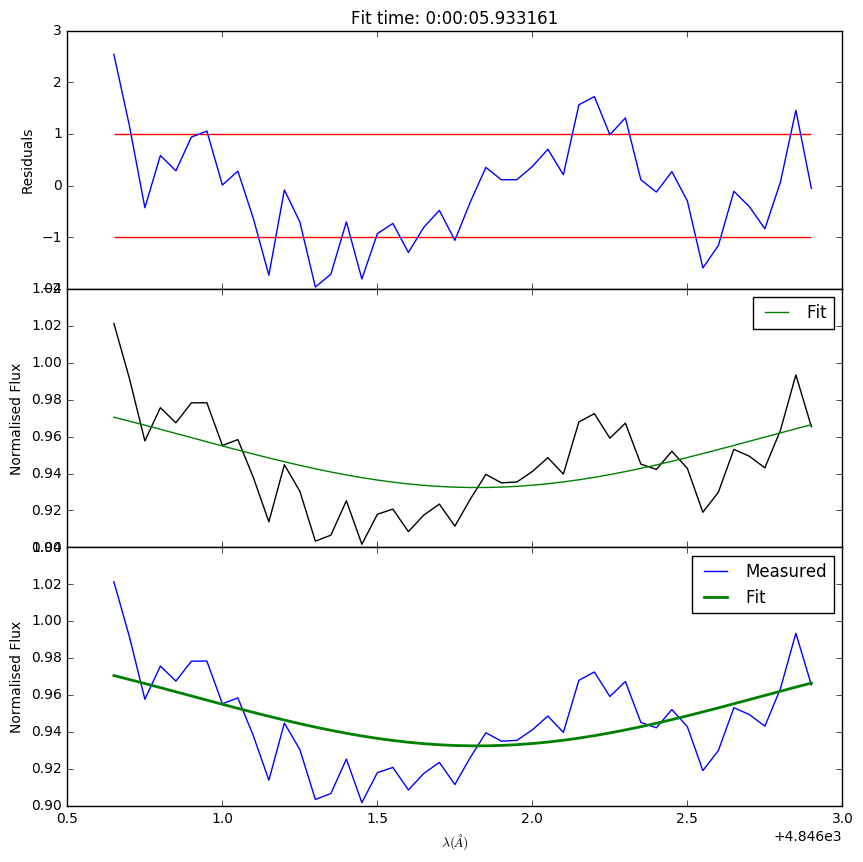

n:  2
Fit 1 BIC:  -28.6037846598 , Fit 2 BIC:  -11.3892682525
BIC Ratio:  2.51146816684
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 3.6 sec
Took: 0:00:03.610490  to finish.


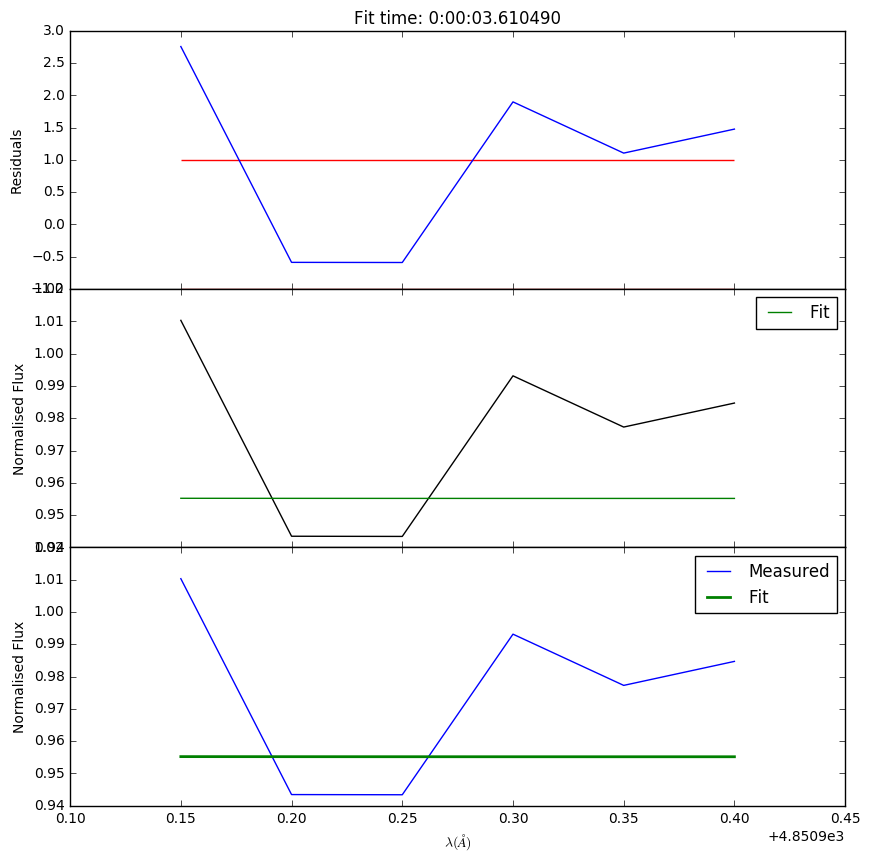

n:  2
Fit 1 BIC:  -127.253773609 , Fit 2 BIC:  -126.065746059
BIC Ratio:  1.00942387276
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 4.0 sec
Took: 0:00:04.044313  to finish.


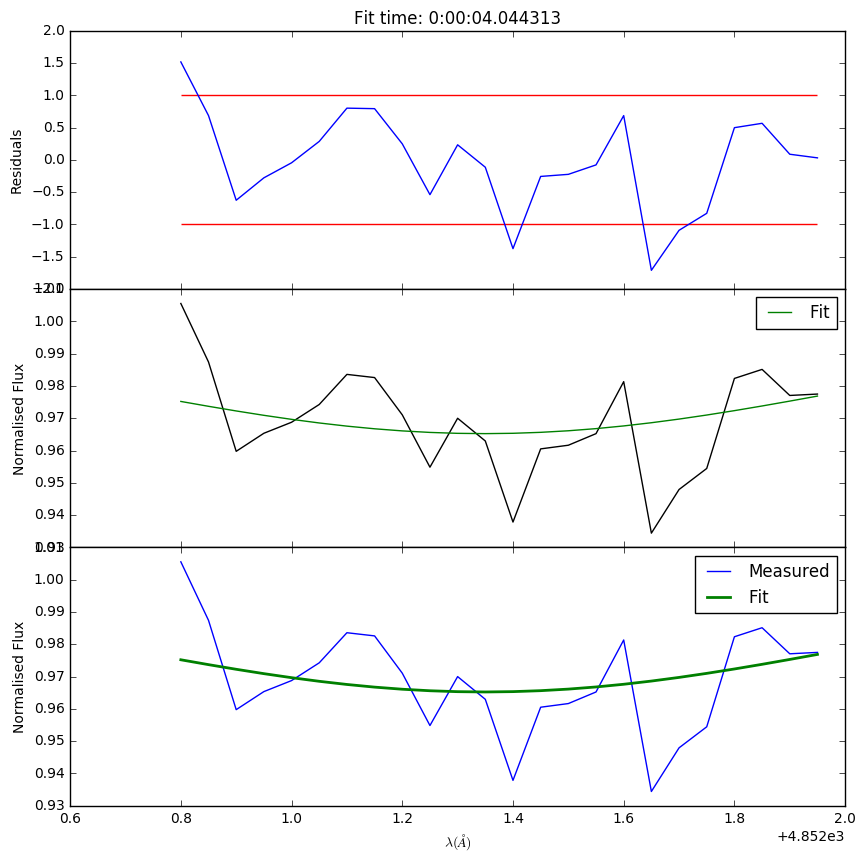

n:  2
Fit 1 BIC:  -235.975029598 , Fit 2 BIC:  -232.159374407
BIC Ratio:  1.01643549911
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 4.2 sec
Took: 0:00:04.168707  to finish.


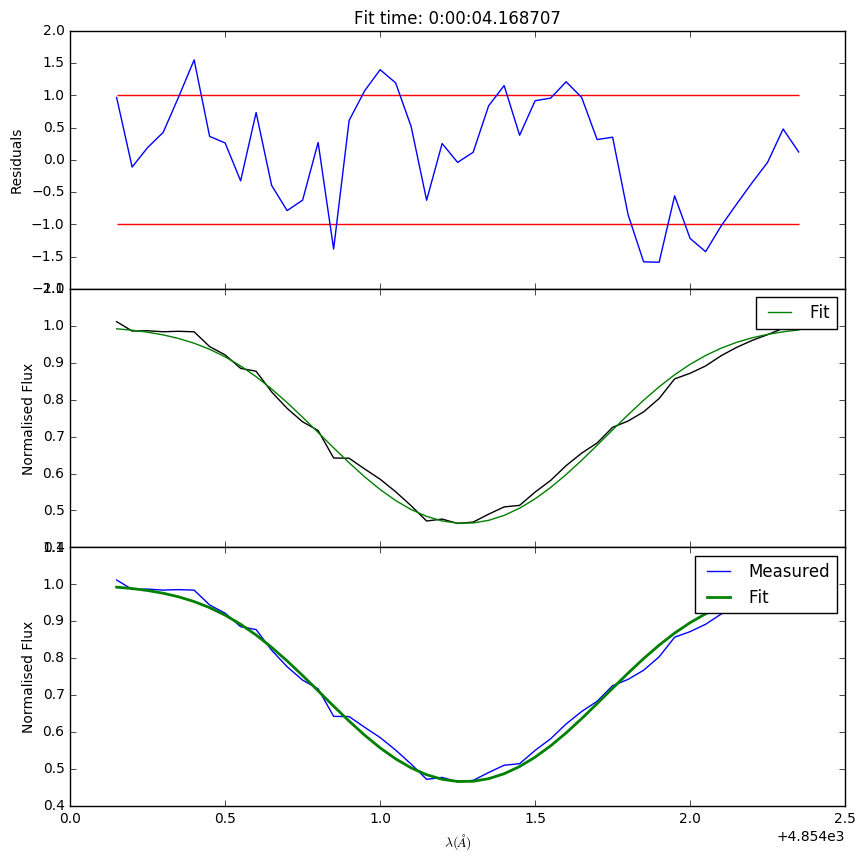

n:  2
Fit 1 BIC:  -158.373158223 , Fit 2 BIC:  -149.690150507
BIC Ratio:  1.05800654009
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 7.1 sec
Took: 0:00:07.099202  to finish.


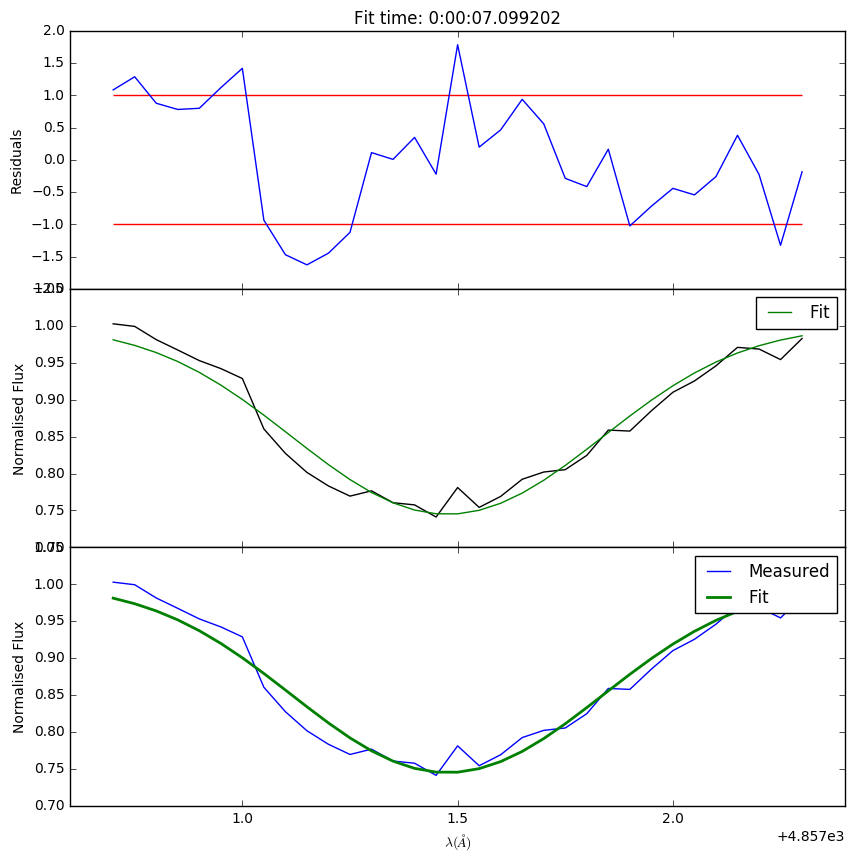

n:  2
Fit 1 BIC:  -384.537440764 , Fit 2 BIC:  -422.538196155
BIC Ratio:  0.910065514227
n:  3
Fit 1 BIC:  -422.538196155 , Fit 2 BIC:  -476.259851467
BIC Ratio:  0.887200957321
n:  4
Fit 1 BIC:  -476.259851467 , Fit 2 BIC:  -476.681199914
BIC Ratio:  0.999116079159
n (final):  3
 [-----------------100%-----------------] 10000 of 10000 complete in 21.9 sec
Took: 0:00:21.927041  to finish.


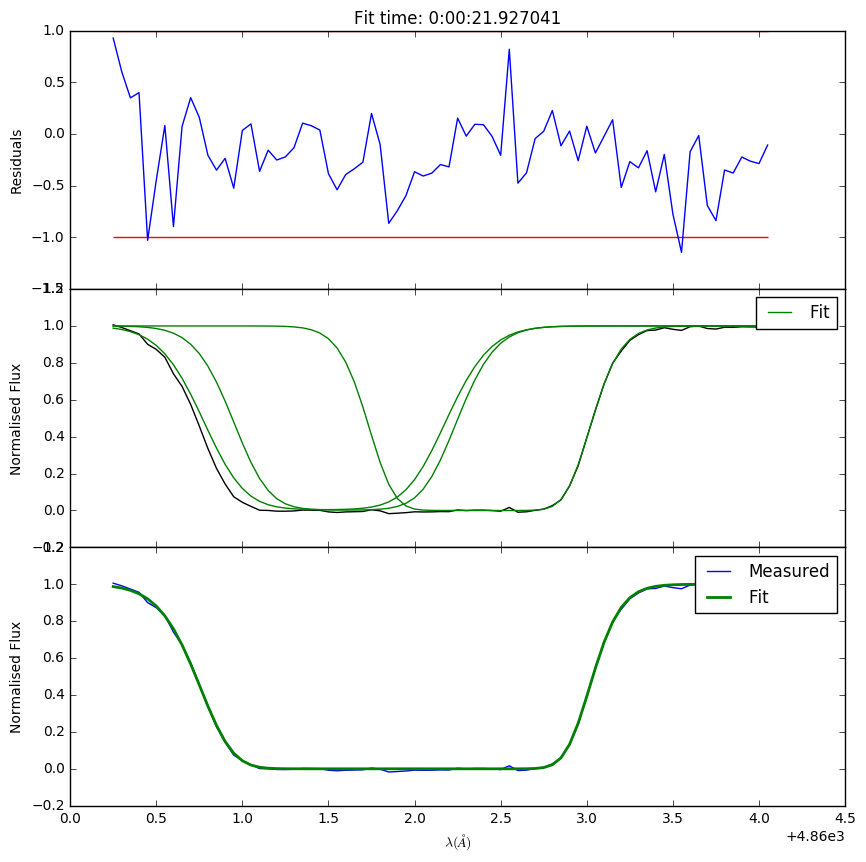

n:  2
Fit 1 BIC:  -268.720705045 , Fit 2 BIC:  -478.888258031
BIC Ratio:  0.561134462035
n:  3
Fit 1 BIC:  -478.888258031 , Fit 2 BIC:  -576.414738704
BIC Ratio:  0.830805019156
n:  4
Fit 1 BIC:  -576.414738704 , Fit 2 BIC:  -562.884816655
BIC Ratio:  1.02403675077
n (final):  3
 [-----------------100%-----------------] 10000 of 10000 complete in 13.5 sec
Took: 0:00:13.466126  to finish.


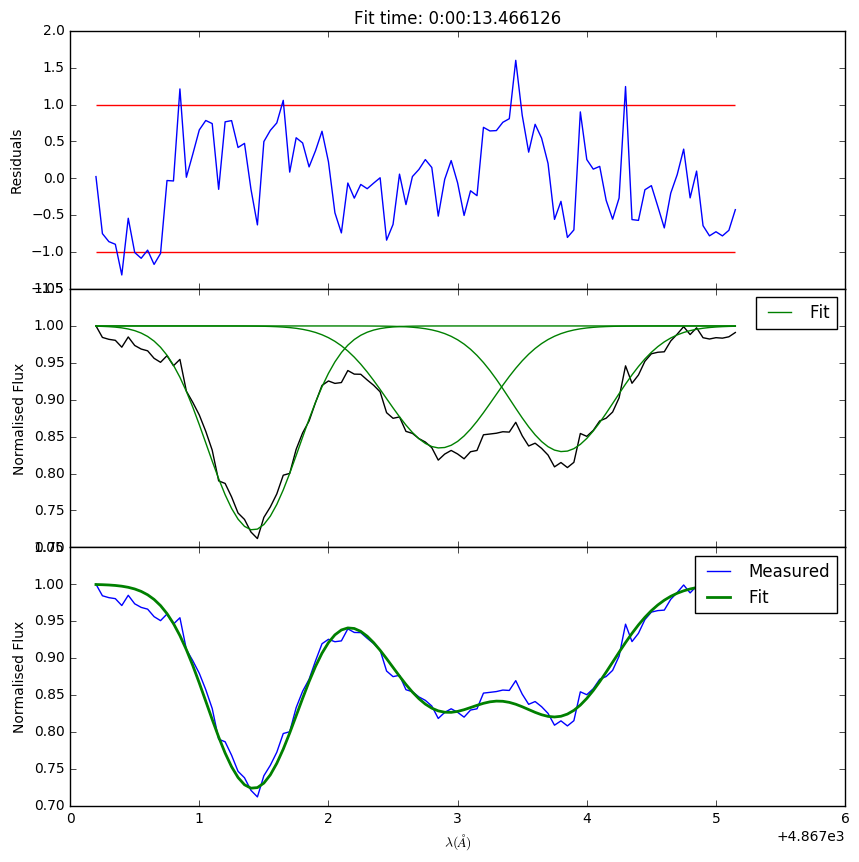

n:  2
Fit 1 BIC:  -216.896679927 , Fit 2 BIC:  -204.689054924
BIC Ratio:  1.0596398523
n (final):  1
 [-----------------100%-----------------] 10000 of 10000 complete in 6.1 sec
Took: 0:00:06.069914  to finish.


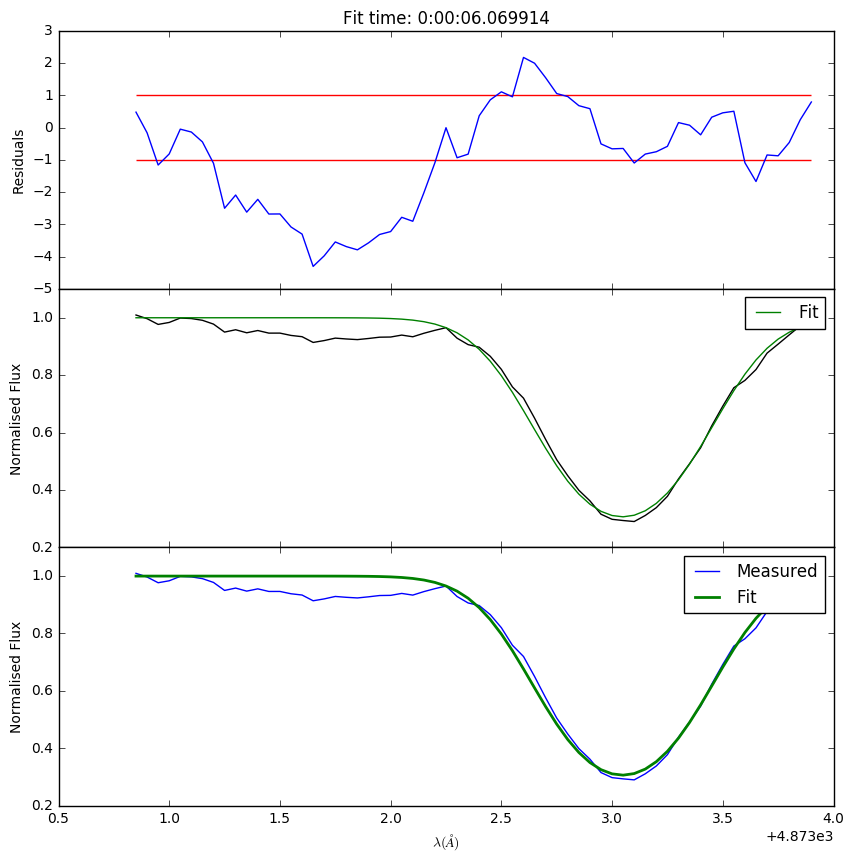

n:  2
Fit 1 BIC:  -1.56497865373 , Fit 2 BIC:  13.3755048628
BIC Ratio:  -0.117003333316
n:  3
Fit 1 BIC:  13.3755048628 , Fit 2 BIC:  -261.375929946
BIC Ratio:  -0.0511734376827
n:  4
Fit 1 BIC:  -261.375929946 , Fit 2 BIC:  -347.123267021
BIC Ratio:  0.752977269972
n:  5
Fit 1 BIC:  -347.123267021 , Fit 2 BIC:  -449.853548202
BIC Ratio:  0.771636165612
n:  6
Fit 1 BIC:  -449.853548202 , Fit 2 BIC:  -454.475371607
BIC Ratio:  0.989830420537
n (final):  5
 [-----------------100%-----------------] 10000 of 10000 complete in 24.7 sec
Took: 0:00:24.694072  to finish.


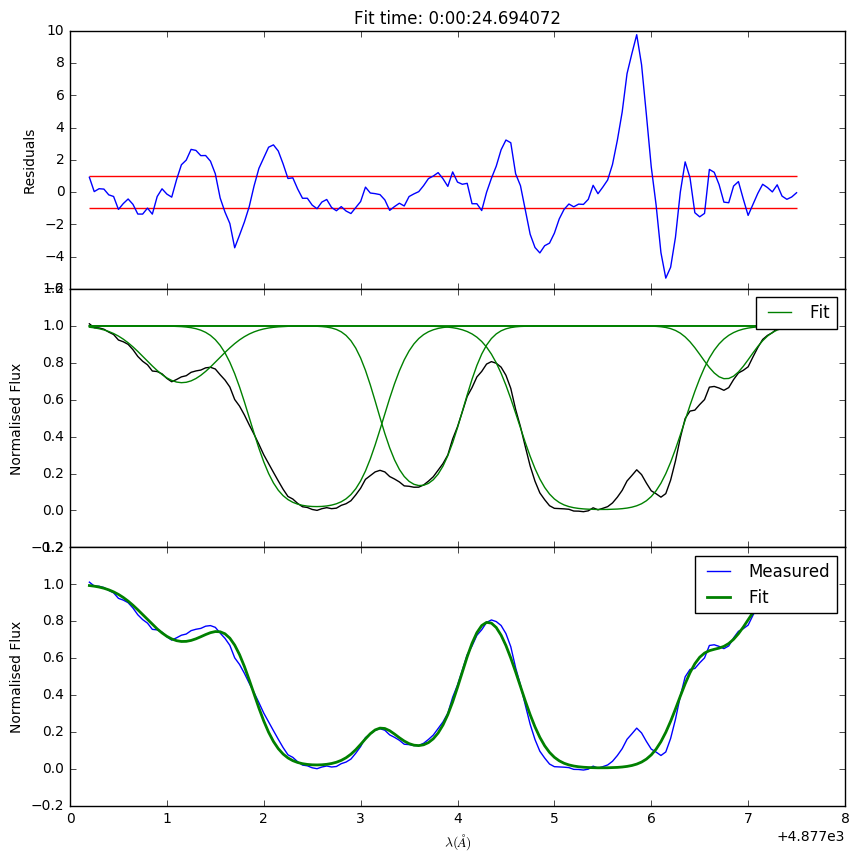

ZeroDivisionError: float division by zero

In [11]:
fits = []

for i in range(len(region_arrays)):
    wavelengths = region_arrays[i][0]
    fluxes = region_arrays[i][1]
    
    r = 0
    n = 1
    
    vpfit_2 = vpfits.VPfit()
    vpfit_2.initialise_model(wavelengths, fluxes, n)
    vpfit_2.map_estimate()

    while r < 0.95:

        n += 1
        print "n: ", n

        vpfit_1 = vpfit_2

        vpfit_2 = vpfits.VPfit()
        vpfit_2.initialise_model(wavelengths, fluxes, n)
        vpfit_2.map_estimate()
        
        print "Fit 1 BIC: ", vpfit_1.MAP.BIC, ", Fit 2 BIC: ", vpfit_2.MAP.BIC
        print "BIC Ratio: ", vpfit_1.MAP.BIC / vpfit_2.MAP.BIC
        
        r = vpfit_1.MAP.BIC / vpfit_2.MAP.BIC
    
    n -= 1
    print "n (final): ", n
    vpfit_1.mcmc_fit()
    
    fits.append(vpfit_1)
    
    start = region_pixels[i][0]
    end = region_pixels[i][1]
    
    vpfit_1.plot(wavelengths, fluxes, n=n, start_pix=start, end_pix=end)